In [15]:
import os
from imutils import paths as im_paths  # untuk mendapatkan daftar path gambar
from PIL import Image  # untuk membaca gambar dari path
import numpy as np  # untuk mengubah gambar ke bentuk array

folder_pilih =  ["Pongamia Pinnata (P7)", "Pomegranate (P9)"]

# Inisialisasi list untuk gambar dan label
labels = []
images = []

# Path ke folder dataset
image_path = im_paths.list_images("./hb74ynkjcn-5")

# Loop melalui semua path gambar
for p in image_path:
    label = str(p).split("\\")

    if not label[1] in folder_pilih:
      continue

    # Gabungkan elemen ke-4 dan ke-5 menjadi satu label
    label_name = " ".join(label[1:3])  # label yang digunakan
    print(label_name)

      # Membaca gambar dan mengubah ukurannya
    image = Image.open(p).convert("RGB")  # memastikan gambar dibaca dalam mode RGB
    image = image.resize((255, 255))
    image = np.array(image) / 255.0  # normalisasi gambar ke [0, 1]
      # Tambahkan gambar dan label ke dalam list
    labels.append(label_name)
    images.append(image)

images = np.array(images)
labels = np.array(labels)

print(len(labels))
print(len(images))

Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate (P9) diseased
Pomegranate 

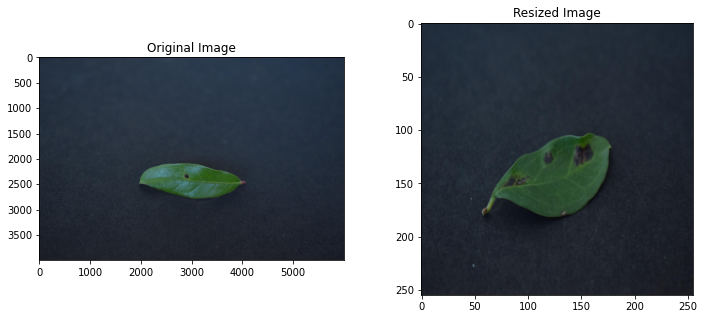

In [68]:
from PIL import Image

# Plot Loss dan Akurasi
plt.figure(figsize=(12, 5))

ori_image = Image.open("hb74ynkjcn-5/Pomegranate (P9)/diseased/0020_0272.JPG")
ori_image = np.array(ori_image)

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(ori_image)
plt.title('Original Image')

# Plot resized image
plt.subplot(1, 2, 2)
plt.imshow(images[0])
plt.title('Resized Image')

plt.show()

In [16]:
print(labels.shape)
print(images.shape)

(1157,)
(1157, 255, 255, 3)


In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [18]:
# Mengonversi label kategori menjadi numerik
le = LabelBinarizer()
labels_le = le.fit_transform(labels)  # 'healthy' menjadi 0, 'diseased' menjadi 1

In [19]:
print(labels_le.shape)
print(images.shape)

(1157, 4)
(1157, 255, 255, 3)


In [23]:
# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(images, labels_le, test_size=0.2, random_state=42)

In [24]:
#Membuat model ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Memuat model ResNet50 tanpa fully connected layer terakhir
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(255, 255, 3))

# Membekukan (freeze) layer ResNet50 agar tidak dilatih ulang
base_model.trainable = False

In [58]:
# Membangun model dengan menambahkan layer di atas ResNet50
model = Sequential([
    base_model,                        # Backbone dari ResNet50
    Flatten(),                         # Mengubah feature maps menjadi vektor 1D
    Dense(256, activation='relu'),     # Layer fully connected
    Dropout(0.6),                     # Dropout untuk mencegah overfitting
    Dense(4, activation='softmax')     # Output layer (sigmoid untuk binary classification)
])

print(X_train.shape)
print(y_train.shape)

(925, 255, 255, 3)
(925, 4)


In [59]:
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=16)

Epoch 1/150
58/58 [==============================] - 13s 225ms/step - loss: 0.5728 - accuracy: 0.2919 - val_loss: 0.5528 - val_accuracy: 0.5345
Epoch 2/150
58/58 [==============================] - 13s 224ms/step - loss: 0.5669 - accuracy: 0.3319 - val_loss: 0.5486 - val_accuracy: 0.4052
Epoch 3/150
58/58 [==============================] - 13s 224ms/step - loss: 0.5667 - accuracy: 0.3362 - val_loss: 0.5495 - val_accuracy: 0.2586
Epoch 4/150
58/58 [==============================] - 13s 225ms/step - loss: 0.5650 - accuracy: 0.3341 - val_loss: 0.5466 - val_accuracy: 0.2586
Epoch 5/150
58/58 [==============================] - 13s 225ms/step - loss: 0.5592 - accuracy: 0.3665 - val_loss: 0.5445 - val_accuracy: 0.4828
Epoch 6/150
58/58 [==============================] - 13s 225ms/step - loss: 0.5644 - accuracy: 0.3351 - val_loss: 0.5425 - val_accuracy: 0.5474
Epoch 7/150
58/58 [==============================] - 13s 225ms/step - loss: 0.5641 - accuracy: 0.3232 - val_loss: 0.5442 - val_accuracy:

In [62]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluasi
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))

8/8 [==============================] - 4s 328ms/step
Accuracy: 0.7068965517241379
Classification Report:
                                 precision    recall  f1-score   support

     Pomegranate (P9) diseased       0.81      0.32      0.46        53
      Pomegranate (P9) healthy       0.61      0.94      0.74        67
Pongamia Pinnata (P7) diseased       0.84      0.52      0.64        52
 Pongamia Pinnata (P7) healthy       0.75      0.95      0.84        60

                      accuracy                           0.71       232
                     macro avg       0.75      0.68      0.67       232
                  weighted avg       0.74      0.71      0.68       232



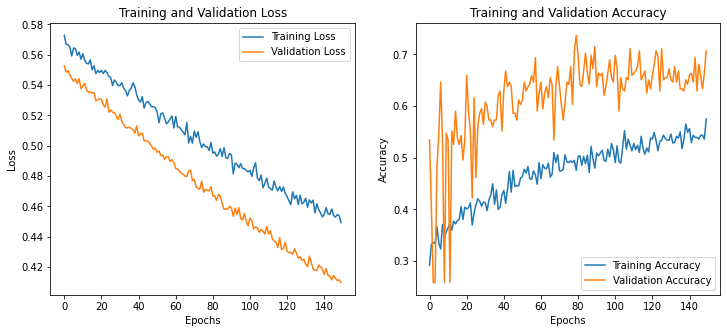

8/8 [==============================] - 10s 1s/step


In [69]:
import matplotlib.pyplot as plt

# Plot Loss dan Akurasi
plt.figure(figsize=(12, 5))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [72]:
print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))

Confusion Matrix:
 [[17 33  2  1]
 [ 3 63  0  1]
 [ 1  7 27 17]
 [ 0  0  3 57]]
